In [3]:
## Problem Statement
## About Company
# Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. 
# Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem
# Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
# application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, 
# Credit History and others. To automate this process, they have given a problem to identify the customers segments, 
# those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial 
# data set.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('loan_data_set.csv')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.shape

(614, 13)

In [8]:
data.iloc[:, 5:9].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

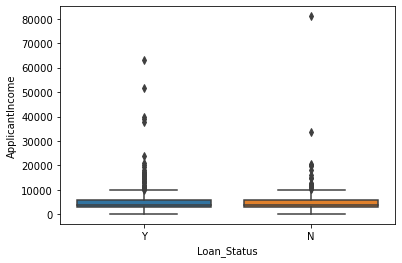

In [9]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)

In [10]:
data[data['ApplicantIncome'] == 81000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [11]:
data.drop(data[data['ApplicantIncome'] == 81000].index, axis=0, inplace=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

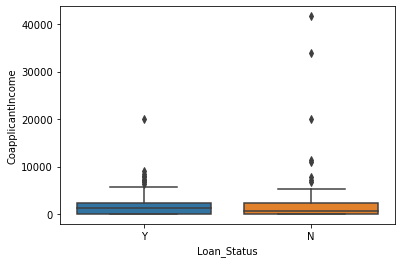

In [12]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data)

In [13]:
data[data['CoapplicantIncome'] == 33837]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N


In [14]:
data.drop(data[data['CoapplicantIncome'] == 33837].index, axis=0, inplace=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

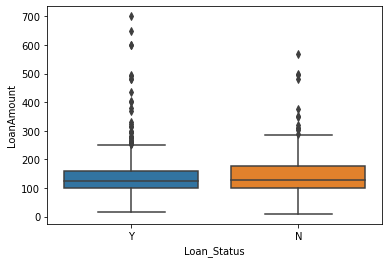

In [15]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)

In [16]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
data.replace({'Loan_Status': {"Y": 1, "N": 0}}, inplace=True)

In [20]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [21]:
data.Dependents.value_counts()

0     273
2      85
1      80
3+     40
Name: Dependents, dtype: int64

In [22]:
data.Dependents = data.Dependents.replace(to_replace='3+', value=4)

In [23]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,478,478,478,478,478,478,478
unique,478,2,2,4,2,2,3
top,LP001003,Male,Yes,0,Graduate,No,Semiurban
freq,1,392,310,273,381,412,191


In [24]:
data.Loan_Status.value_counts()

1    332
0    146
Name: Loan_Status, dtype: int64

In [25]:
data.Credit_History.value_counts()

1.0    409
0.0     69
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

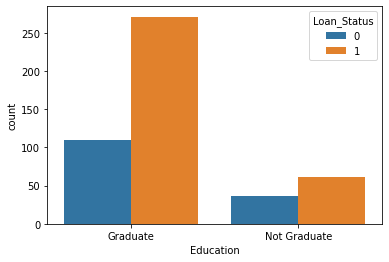

In [26]:
sns.countplot(x='Education', hue='Loan_Status', data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

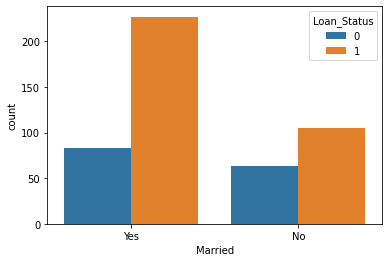

In [27]:
sns.countplot(x='Married', hue='Loan_Status', data=data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

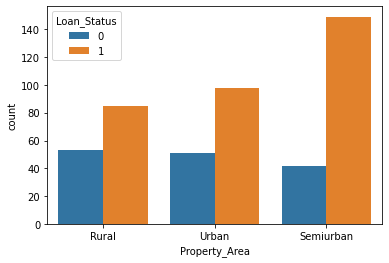

In [28]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

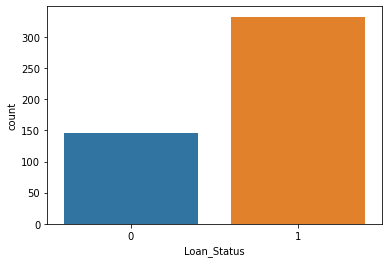

In [29]:
sns.countplot(x='Loan_Status', data=data)

In [30]:
data.replace({'Gender': {'Male': 1, 'Female': 0}, 'Married': {'No': 0, 'Yes': 1}, 'Education': {'Graduate': 1, 'Not Graduate': 0},
             'Self_Employed': {'Yes': 1, 'No': 0}, 'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0}}, inplace=True)

In [31]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            478 non-null    object 
 1   Gender             478 non-null    int64  
 2   Married            478 non-null    int64  
 3   Dependents         478 non-null    object 
 4   Education          478 non-null    int64  
 5   Self_Employed      478 non-null    int64  
 6   ApplicantIncome    478 non-null    int64  
 7   CoapplicantIncome  478 non-null    float64
 8   LoanAmount         478 non-null    float64
 9   Loan_Amount_Term   478 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      478 non-null    int64  
 12  Loan_Status        478 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 68.4+ KB


In [33]:
data.drop('Loan_ID', axis=1, inplace=True)

In [34]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


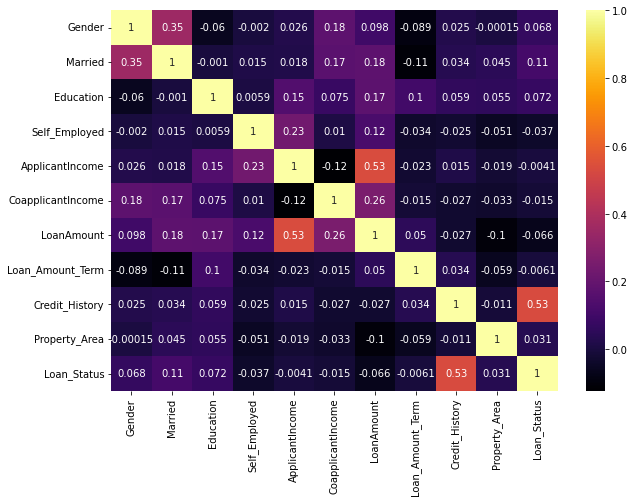

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

In [36]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


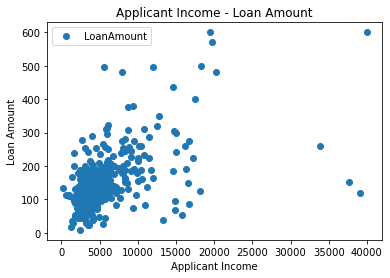

In [37]:
data.plot(x='ApplicantIncome', y='LoanAmount', style='o')  
plt.title('Applicant Income - Loan Amount')  
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')  
plt.show()

In [38]:
# Square Root Transformation

data.ApplicantIncome = np.sqrt(data.ApplicantIncome)
data.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)
data.LoanAmount = np.sqrt(data.LoanAmount)

In [39]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,1,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,0,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,1,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
5,1,1,2,1,1,73.600272,64.776539,16.340135,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,53.851648,0.000000,8.426150,360.0,1.0,0,1
610,1,1,4,1,0,64.078077,0.000000,6.324555,180.0,1.0,0,1
611,1,1,1,1,0,89.844310,15.491933,15.905974,360.0,1.0,2,1
612,1,1,2,1,0,87.080423,0.000000,13.674794,360.0,1.0,2,1


In [40]:
X = data.iloc[:, :-1]
y = data.Loan_Status

In [41]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,67.697858,38.832976,11.313708,360.0,1.0,0
2,1,1,0,1,1,54.772256,0.000000,8.124038,360.0,1.0,2
3,1,1,0,0,0,50.823223,48.559242,10.954451,360.0,1.0,2
4,1,0,0,1,0,77.459667,0.000000,11.874342,360.0,1.0,2
5,1,1,2,1,1,73.600272,64.776539,16.340135,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,53.851648,0.000000,8.426150,360.0,1.0,0
610,1,1,4,1,0,64.078077,0.000000,6.324555,180.0,1.0,0
611,1,1,1,1,0,89.844310,15.491933,15.905974,360.0,1.0,2
612,1,1,2,1,0,87.080423,0.000000,13.674794,360.0,1.0,2


In [42]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 478, dtype: int64

In [43]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
X, y = SMOTE().fit_resample(X, y)

In [46]:
y.value_counts()

0    332
1    332
Name: Loan_Status, dtype: int64

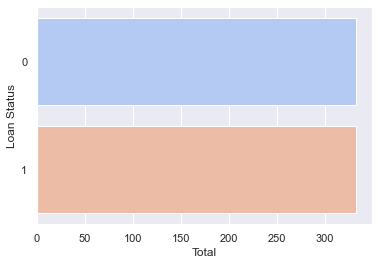

In [47]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=data, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [54]:
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 0, 'Feature Importance')

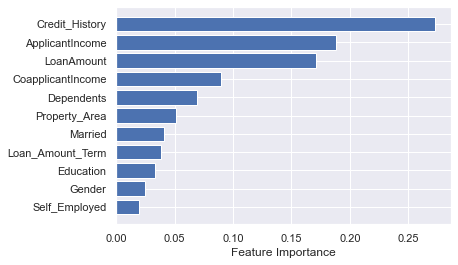

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.barh(data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [49]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
629,0,0,0.0,0,0,59.084873,0.000000,8.894162,360.0,0.171395,1
436,1,1,2.0,0,0,60.621778,15.556349,10.392305,360.0,1.000000,1
192,1,1,1.0,0,0,81.289606,0.000000,11.704700,180.0,1.000000,2
31,1,0,0.0,1,0,42.426407,34.828150,6.855655,360.0,1.000000,2
34,1,1,0.0,1,0,76.295478,0.000000,12.000000,360.0,1.000000,2


In [50]:
y_train.head()

629    0
436    1
192    1
31     1
34     1
Name: Loan_Status, dtype: int64

In [51]:
y_test.head()

268    1
110    1
221    0
529    0
62     0
Name: Loan_Status, dtype: int64

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

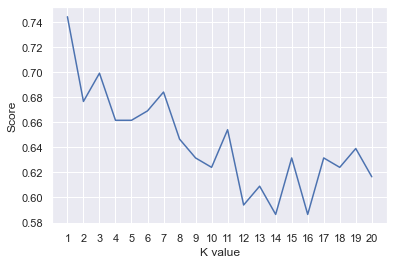

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        67
           1       0.62      0.58      0.60        66

    accuracy                           0.62       133
   macro avg       0.62      0.62      0.62       133
weighted avg       0.62      0.62      0.62       133

KNN accuracy: 64.36%


In [83]:
scoreknn = []
for i in range(1,21):
    KNNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNNclassifier.fit(X_train, y_train)
    scoreknn.append(KNNclassifier.score(X_test, y_test))
    
y_pred = KNNclassifier.predict(X_test)
    
plt.plot(range(1,21), scoreknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNNacc = np.mean(scoreknn)

print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

print("KNN accuracy: {:.2f}%".format(KNNacc*100))

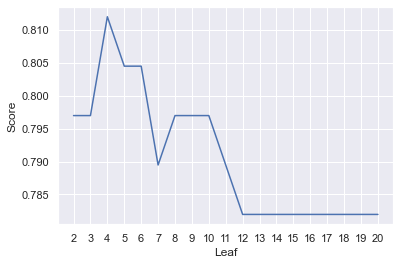

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        67
           1       0.78      0.79      0.78        66

    accuracy                           0.78       133
   macro avg       0.78      0.78      0.78       133
weighted avg       0.78      0.78      0.78       133

Decision Tree Accuracy: 79.07%


In [84]:
scoreDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreDT.append(DTclassifier.score(X_test, y_test))
    
y_pred = DTclassifier.predict(X_test)
    
plt.plot(range(2,21), scoreDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTacc = np.mean(scoreDT)

print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

print("Decision Tree Accuracy: {:.2f}%".format(DTacc*100))

In [86]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRacc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRacc*100))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        67
           1       0.68      0.70      0.69        66

    accuracy                           0.68       133
   macro avg       0.68      0.68      0.68       133
weighted avg       0.68      0.68      0.68       133

LR accuracy: 68.42%


C:\Users\daksh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


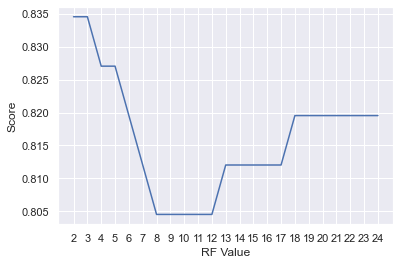

Random Forest Accuracy:  81.63%


In [96]:
scoreRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFacc = np.mean(scoreRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFacc*100))

In [120]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRacc*100, KNNacc*100, DTacc*100, RFacc*100]})

compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Random Forest,81.627983
2,Decision Tree,79.066086
0,Logistic Regression,68.421053
1,K Neighbors,64.360902


In [121]:
# Random forest has the best accuracy, it can be used further for predictions

In [108]:
rfc = RandomForestClassifier()
parameters = {'n_estimators': [250, 500, 750, 1000], 'max_features': [5, 6, 8]}
grid = GridSearchCV(rfc, parameters)

In [109]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 6, 8],
                         'n_estimators': [250, 500, 750, 1000]})

In [110]:
grid.best_params_

{'max_features': 6, 'n_estimators': 500}

In [111]:
pred = grid.best_estimator_.predict(X_test)

In [112]:
confusion_matrix(y_test,pred)

array([[54, 13],
       [ 9, 57]], dtype=int64)

In [113]:
print("Accuracy score: {0}%".format((accuracy_score(y_test,pred)*100).round(2)))

Accuracy score: 83.46%
